### This Notebook includes Machine Learning steps provided below:

__Data:__                       
- cleaning;               
- transformation;        
- plotting.          

__Features:__
- feature selection;
- feature engineering. 

__Model:__   
- model selection;
- evaluation;
- improvement.

## STEP 1: DATA CLEANING, TRANSFORMATION AND PLOTTING

## 1. Importing necessary libraries 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from datetime import datetime as dt

## 2. Importing data

In [14]:
BASE_PATH = "/home/mh06/dsti/new/dsti-ml-book-ratings"
filename = f"{BASE_PATH}/data/raw/scraped/books_merged.csv"

books_df = pd.read_csv(filename, sep=',', on_bad_lines='warn', index_col="bookID", encoding='utf-8')

print(books_df.shape)
books_df.head(3)

(11123, 16)


,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,written_books,followers,quotes,discussions,questions
bookID,,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,609.0,22200.0,882.0,194.0,74.0
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,627.0,22200.0,1152.0,307.0,107.0
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,609.0,22200.0,745.0,483.0,127.0


In [15]:
# Checking how many missing values we have in our dataframe
books_df.isnull().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
written_books         5
followers             5
quotes                1
discussions           1
questions             1
dtype: int64

There are very few missing values from scraped columns

## 3. Exploring the variabels (both numerical and categorical one) to understand the data better

In [16]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11123 entries, 1 to 45641
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   isbn                11123 non-null  object 
 4   isbn13              11123 non-null  int64  
 5   language_code       11123 non-null  object 
 6   num_pages           11123 non-null  int64  
 7   ratings_count       11123 non-null  int64  
 8   text_reviews_count  11123 non-null  int64  
 9   publication_date    11123 non-null  object 
 10  publisher           11123 non-null  object 
 11  written_books       11118 non-null  float64
 12  followers           11118 non-null  float64
 13  quotes              11122 non-null  float64
 14  discussions         11122 non-null  float64
 15  questions           11122 non-null  float64
dtypes: float6

From the column information above, there are _int64_ and _float64_ types of variables which are numerical in nature (6 of them are float64, 4 - int64) and string type presented as _object_ (6 ones).

In most cases dtypes are correct, except the publication_date column that we will investigate later and decide if it is needed to modify from object to datetime type. In addition to this, it is better to have datatype as integer for the last 5 columns.

In [19]:
# Let's check if there are any dublicate values in our dataset
for column_name in books_df.columns:
    print("Column name -", column_name, ": ", books_df[column_name].duplicated().any())

Column name - title :  True
Column name - authors :  True
Column name - average_rating :  True
Column name - isbn :  False
Column name - isbn13 :  False
Column name - language_code :  True
Column name - num_pages :  True
Column name - ratings_count :  True
Column name - text_reviews_count :  True
Column name - publication_date :  True
Column name - publisher :  True
Column name - written_books :  True
Column name - followers :  True
Column name - quotes :  True
Column name - discussions :  True
Column name - questions :  True


### bookID, isbn and isbn13 columns

Before diving deeply in cleaning and analysis of all the varibles in the dataset let's focus on columns that represent identification numbers - __isbn__ and __isbn13__ - they are unique.

However, we consider that these columns should not have any impact on the average book rating that is why it was decided to drop them and do not use in the analysis or the machine learning model.

The same situation with __bookID__ which was set as an index for dealing with merging of the scraped dataframes. Let's reset the index of the dataframe and delete the column bookID as well.

In [21]:
books_df = books_df.reset_index()
books_df = books_df.drop(['bookID', 'isbn', 'isbn13'], axis=1)
books_df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'written_books', 'followers', 'quotes', 'discussions', 'questions'],
      dtype='object')

# __________________________________

### _- Exploring the numerical variables in our dataset_

In [22]:
books_df.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,written_books,followers,quotes,discussions,questions
count,11123.000000,11123.000000,1.112300e+04,11123.000000,11118.000000,11118.000000,11122.000000,11122.000000,11122.000000
mean,3.934075,336.405556,1.794285e+04,542.048099,967.931822,7685.205523,68.123809,18.735120,5.833034
std,0.350485,241.152626,1.124992e+05,2576.619589,3586.863567,15253.646423,225.371699,76.427176,20.972338
min,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.770000,192.000000,1.040000e+02,9.000000,51.000000,156.000000,0.000000,0.000000,0.000000
50%,3.960000,299.000000,7.450000e+02,47.000000,156.000000,1628.000000,3.000000,1.000000,0.000000
75%,4.140000,416.000000,5.000500e+03,238.000000,584.000000,6938.000000,29.000000,5.000000,3.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000,79100.000000,99400.000000,2801.000000,1824.000000,553.000000


### Average rating (The target)

According to the informanion in the table above some books have an average rating that equals 0 or do not have any pages or text review.

Let's check if this situation when books have 0 pages, 0 ratings count and 0 text_reviews.

In [23]:
zero_rating = books_df.loc[books_df['average_rating'] == 0]
zero_rating

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,written_books,followers,quotes,discussions,questions
265,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,eng,295,0,0,9/1/2001,Lonely Planet,5240.0,781.0,0.0,0.0,0.0
375,Juiced Official Strategy Guide,Doug Walsh,0.0,eng,112,0,0,6/1/2005,BradyGames,14.0,0.0,0.0,0.0,0.0
987,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,eng,200,0,0,10/13/2000,Grove Press Open City Books,78.0,210.0,0.0,0.0,0.0
2532,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,eng,228,0,0,1/1/2004,Frederick P. Lenz Foundation for American Budd...,6.0,3.0,0.0,0.0,0.0
2533,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,eng,304,0,0,1/1/2003,Frederick P. Lenz Foundation for American Budd...,6.0,3.0,0.0,0.0,0.0
2758,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,srp,222,0,0,1/1/1996,"Izdavačka agencija ""Draganić""",78.0,2.0,0.0,0.0,0.0
3492,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,eng,71,0,0,8/20/1992,Macmillan,97.0,0.0,0.0,0.0,0.0
4241,American Film Guide,Frank N. Magill,0.0,eng,5,0,0,1/1/1983,Salem Press Inc,434.0,7.0,0.0,0.0,0.0
4677,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.0,eng,386,0,0,11/8/2002,Routledge,15.0,0.0,0.0,0.0,0.0
5323,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.0,eng,63,0,0,12/31/1997,Arts Publications,59.0,4.0,0.0,0.0,0.0


In [24]:
# Let's find out how many rows have 0 rating
len(zero_rating)

25

The provided result means that these books have never been rated because rating_count and text_reviews_count equal to 0.
We decide to keep these rows*

In [ ]:
#books_df = books_df.drop(zero_rating.index)
#books_df.shape

In addition to this, let's check the situation when ratings_count is equal 0 that means there are no ratings to count.

In [28]:
zero_rating_count = books_df[books_df.ratings_count  == 0]
zero_rating_count.shape[0]

80

This is more than zero_rating (where average rating is 0) it should be the same count. If no one rated the book, it should have an average rating of 0.

Let's check the rows where it's not verified and drop them.

In [31]:
books_df[(books_df['ratings_count']==0) & (books_df['average_rating']!=0)]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,written_books,followers,quotes,discussions,questions
264,Lonely Planet Londres,Lonely Planet/Sarah Johnstone/Tom Masters,4.03,spa,480,0,0,5/1/2006,Geoplaneta,5240.0,781.0,0.0,0.0,0.0
525,American Government: Continuity and Change Al...,Karen O'Connor/Larry J. Sabato,2.83,eng,664,0,0,3/11/2005,Longman Publishing Group,55.0,1.0,0.0,0.0,0.0
526,Essentials of American and Texas Government: C...,Karen O'Connor/Larry J. Sabato,3.50,eng,854,0,0,7/29/2005,Longman Publishing Group,55.0,1.0,0.0,0.0,0.0
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.00,grc,364,0,0,2/22/1922,Oxford University Press USA,1872.0,600.0,0.0,0.0,0.0
747,Melville and the politics of identity: From *K...,Julian Markels,3.33,eng,164,0,0,7/1/1993,University of Illinois Press,10.0,0.0,0.0,0.0,0.0
935,April May und June,Elizabeth von Arnim,3.88,ger,88,0,0,4/1/1995,Insel Frankfurt,128.0,474.0,34.0,2.0,0.0
1110,Dr No / Moonraker / Thunderball / From Russia ...,Ian Fleming,3.98,eng,862,0,0,1/1/1984,Heinemann-Octopus,697.0,2919.0,0.0,0.0,0.0
1681,V.S. Naipaul,Bruce Alvin King,2.00,eng,240,0,0,10/10/2003,Palgrave Macmillan,28.0,0.0,0.0,0.0,0.0
2051,The Baby Emergency (Tennengarrah Clinic #1),Carol Marinelli,3.60,eng,285,0,0,6/1/2004,Mills & Boon,1242.0,426.0,0.0,0.0,0.0
2255,Animales No Se Visten Los (Animals Should Def...,Judi Barrett/Ron Barrett,4.11,eng,32,0,0,10/30/1991,Live Oak Media,51.0,98.0,0.0,11.0,0.0


In [32]:
# Dropping the rows that match the condition
condition = (books_df['ratings_count'] == 0) & (books_df['average_rating'] != 0)
books_df.drop(books_df[condition].index, inplace=True)

In [36]:
print(books_df.shape)
print(books_df[condition].shape[0])

(11068, 14)
0


/tmp/ipykernel_9017/10627208.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



#### Average rating distribution

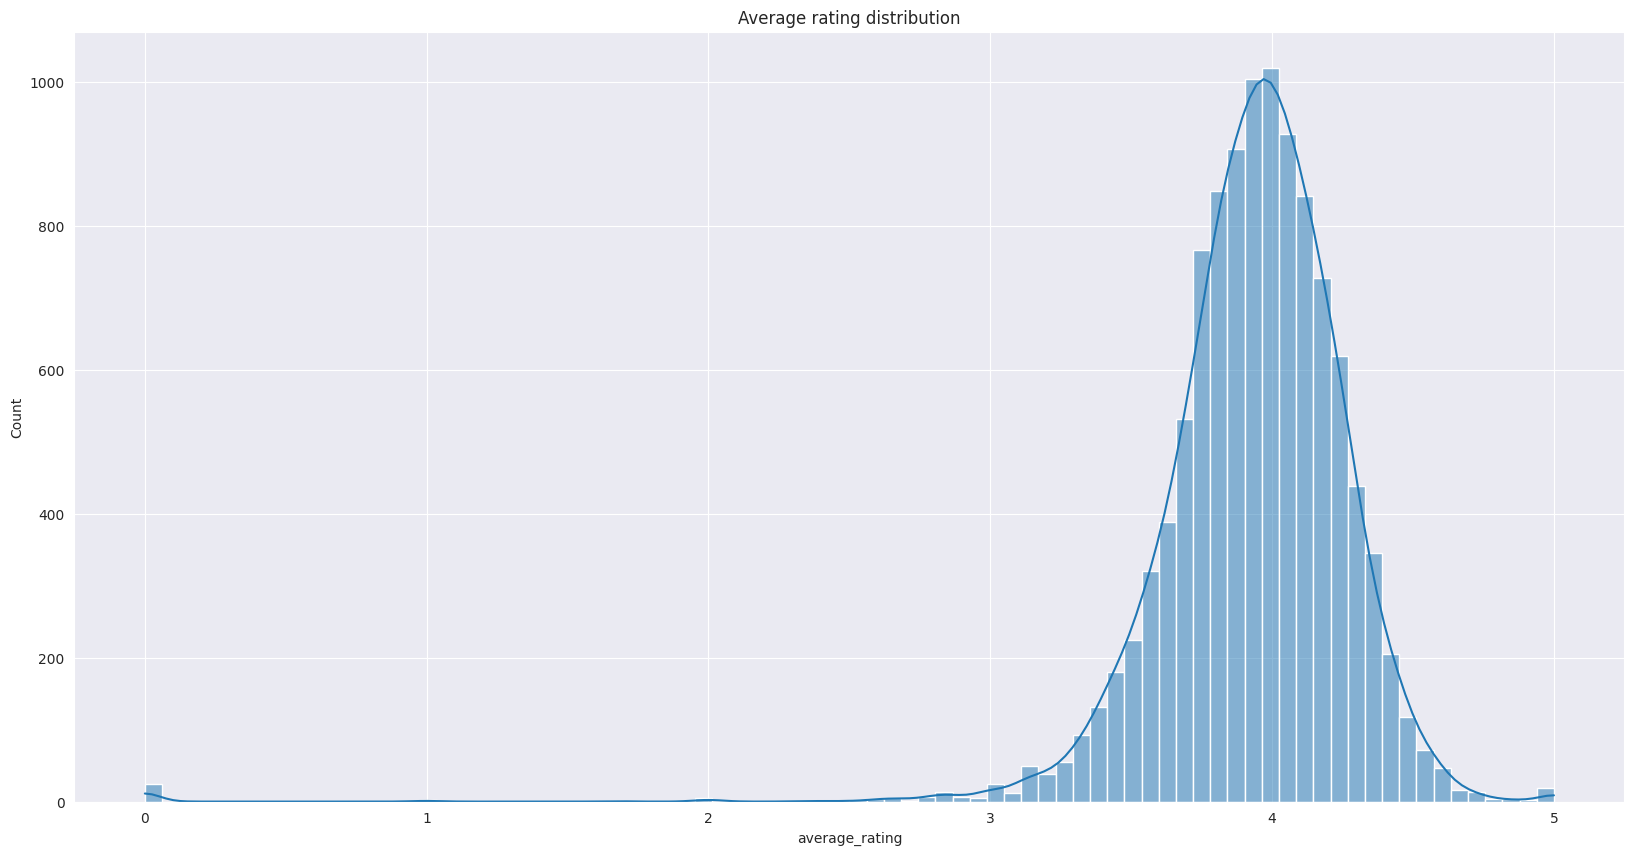

In [37]:
plt.figure(figsize=(20,10))
sns.histplot(books_df.average_rating,bins=82, kde=True).set(title='Average rating distribution')
plt.show()

Looks like a normal distribution Woah!

In [38]:
books_df.average_rating.skew()

-3.6192022727296043

In [39]:
books_df.average_rating.describe()

count    11068.000000
mean         3.934321
std          0.349271
min          0.000000
25%          3.770000
50%          3.960000
75%          4.130000
max          5.000000
Name: average_rating, dtype: float64

So the distribution of average rating is skewed to lower ratings a little bit.

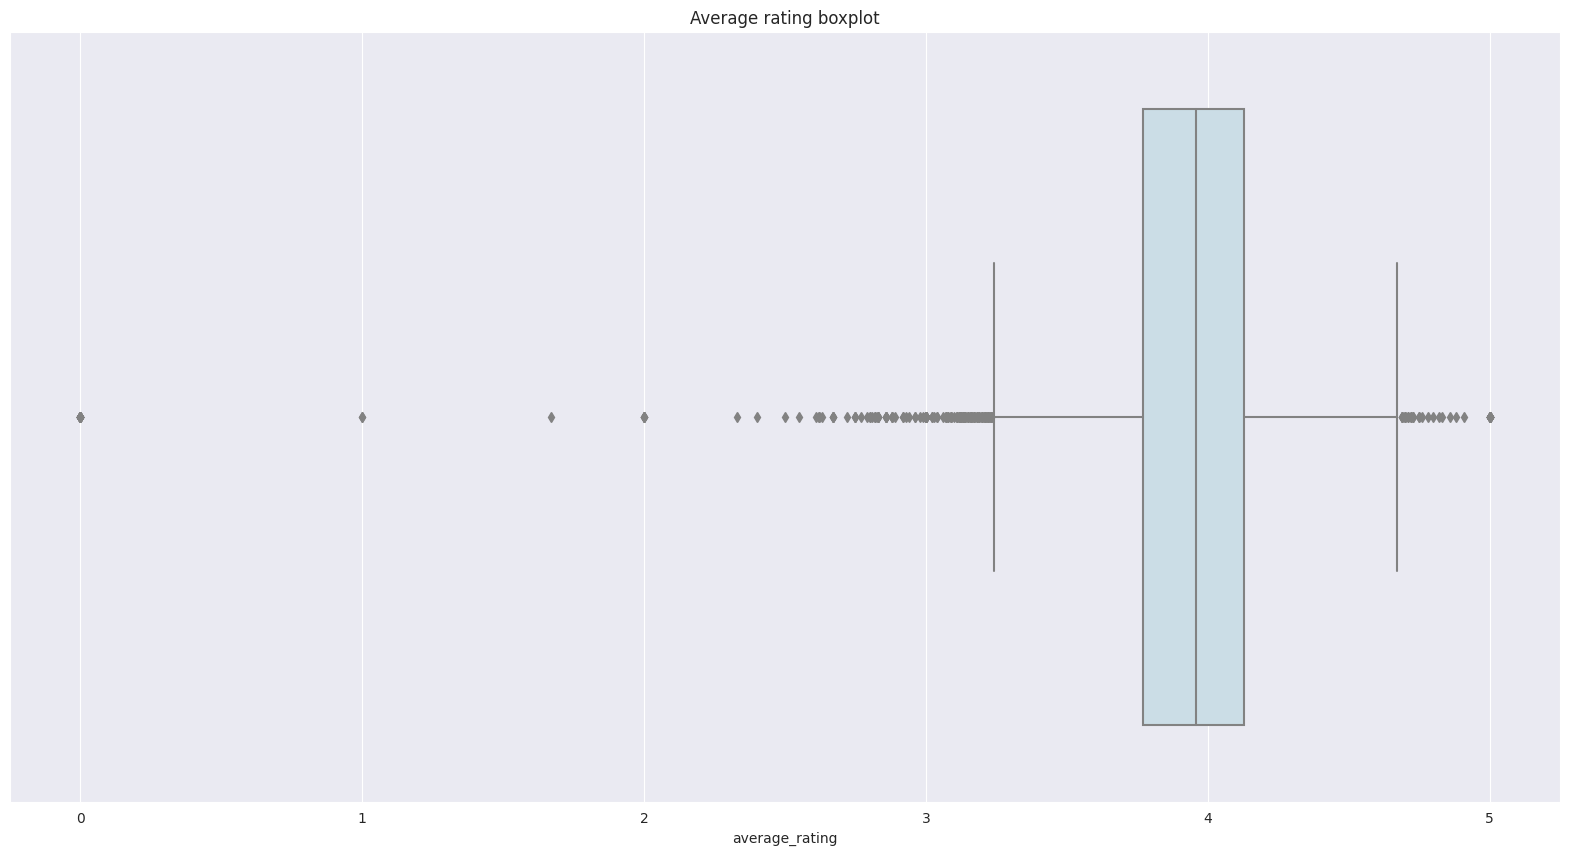

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(x=books_df.average_rating, palette = ("ch:s=.25,rot=-.25")).set(title='Average rating boxplot')
plt.show()

### Number of pages

In [41]:
books_df['num_pages'].describe()

count    11068.000000
mean       336.516715
std        240.914197
min          0.000000
25%        193.000000
50%        299.000000
75%        416.000000
max       6576.000000
Name: num_pages, dtype: float64

It is mentioned that there are books with 0 pages. Let's check how many.

In [42]:
books_df.loc[books_df['num_pages'] == 0].shape[0]

75

In the table above we can see there are 75 books that have 0 page. 

Most probably books with pages less than 30 are audiobooks or press editions.

In [43]:
books_df[books_df['num_pages'] < 30].sort_values(by='num_pages', ascending = False)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,written_books,followers,quotes,discussions,questions
10940,Code Check Electrical: An Illustrated Guide to...,Michael Casey/Redwood Kardon/Douglas Hansen,4.67,eng,29,3,0,11/11/2005,Taunton Press,3.0,0.0,0.0,0.0,0.0
923,Sir Gawain and the Green Knight,Selina Shirley Hastings/Juan Wijngaard,3.91,eng,29,65,9,6/27/1991,Walker Books Ltd,24.0,24.0,0.0,0.0,0.0
4820,Music of the Meadow (Little Einsteins Early Re...,Susan Ring/Kelly Preston/Katie Nix,3.70,eng,28,26,1,9/1/2006,Disney Press,348.0,2.0,0.0,0.0,0.0
2115,Farm Animals (A Chunky Book),Phoebe Dunn,3.86,eng,28,35,4,2/12/1984,Random House Books for Young Readers,35.0,0.0,0.0,0.0,0.0
11044,Joseph Cornell: Secrets in a Box (Adventures i...,Alison Baverstock/Joseph Cornell/Christopher W...,4.03,eng,27,32,5,9/1/2003,Prestel Publishing,29.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,And Then There Were None,Agatha Christie/Hugh Fraser,4.26,eng,0,214,49,10/15/2004,Audiogo,5303.0,60800.0,178.0,289.0,87.0
5866,The Michael Crichton Collection: Jurassic Park...,Michael Crichton/Chris Noth/Anthony Heald,4.29,eng,0,107,3,6/9/2000,Random House Audio,201.0,16700.0,0.0,0.0,0.0
5848,Waterworks,E.L. Doctorow/Sam Waterston,3.44,eng,0,16,2,5/31/1994,Random House Audio,91.0,1037.0,3.0,0.0,1.0
5846,The Wheel of Darkness (Pendergast #8),Douglas Preston/Lincoln Child,3.93,en-US,0,41,9,8/28/2007,Grand Central Publishing,140.0,11500.0,9.0,2.0,5.0


Additionnally, we noticed there are authors named NOT A BOOK, let's check these rows.

In [44]:
not_a_book = books_df.loc[books_df.authors=='NOT A BOOK']
not_a_book

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,written_books,followers,quotes,discussions,questions
1061,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.0,eng,0,7,2,10/3/2006,Simon Schuster Audio,324.0,0.0,0.0,0.0,0.0
1064,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.5,eng,0,12,1,10/1/2003,Simon & Schuster Audio,513.0,34.0,0.0,0.0,0.0
5474,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.0,eng,2,3,0,4/1/1996,BBC Physical Audio,324.0,0.0,0.0,0.0,0.0
5476,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.0,eng,2,2,0,10/2/1995,BBC Physical Audio,324.0,0.0,0.0,0.0,0.0


According to the results, there are 4 books which are NOT A BOOK according to the author column. They are CDs indeed regarding to the information on the Internet. So there rows should be removed from our dataset. 

In [45]:
books_df = books_df.drop(not_a_book.index)
books_df.shape

(11064, 14)

Also we can assume that books with num_pages larger than 1500 can be a book sets or a study. 

In [46]:
books_df[books_df['num_pages'] > 1500].sort_values(by='num_pages', ascending = False)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,written_books,followers,quotes,discussions,questions
6497,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,eng,6576,1338,81,10/17/2004,W. W. Norton Company,246.0,2125.0,4.0,0.0,3.0
6802,The Second World War,Winston S. Churchill/John Keegan,4.45,eng,4736,1493,99,5/9/1986,Mariner Books,1041.0,2260.0,4.0,1.0,4.0
10906,Remembrance of Things Past (Boxed Set),Marcel Proust/C.K. Scott Moncrieff/Frederick A...,4.34,eng,3400,6,1,3/5/1981,Chatto & Windus,1897.0,6122.0,953.0,20.0,10.0
6,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,28242,808,9/12/2005,Scholastic,627.0,22200.0,0.0,60.0,2.0
6822,Summa Theologica 5 Vols,Thomas Aquinas,4.12,eng,3020,2734,84,1/1/1981,Christian Classics,1595.0,857.0,134.0,1.0,3.0
7862,Harrison's Principles of Internal Medicine,Dennis L. Kasper/Dan L. Longo/Stephen L. Hause...,4.35,eng,2751,23,4,7/27/2004,McGraw-Hill Medical Publishing,24.0,8.0,5.0,0.0,1.0
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic,627.0,22200.0,1.0,20.0,2.0
10749,The Sword of Truth Boxed Set I: Wizard's Firs...,Terry Goodkind,4.29,en-US,2480,4196,81,11/15/1998,Tor Books,236.0,11600.0,1.0,2.0,0.0
6257,The J.R.R. Tolkien Companion and Guide,Christina Scull/Wayne G. Hammond,4.64,eng,2264,45,0,11/2/2006,Houghton Mifflin Harcourt,22.0,14.0,0.0,0.0,0.0
5614,Study Bible: NIV,Anonymous,4.70,eng,2198,4166,186,10/1/2002,Zondervan Publishing House,79100.0,3112.0,49.0,3.0,5.0


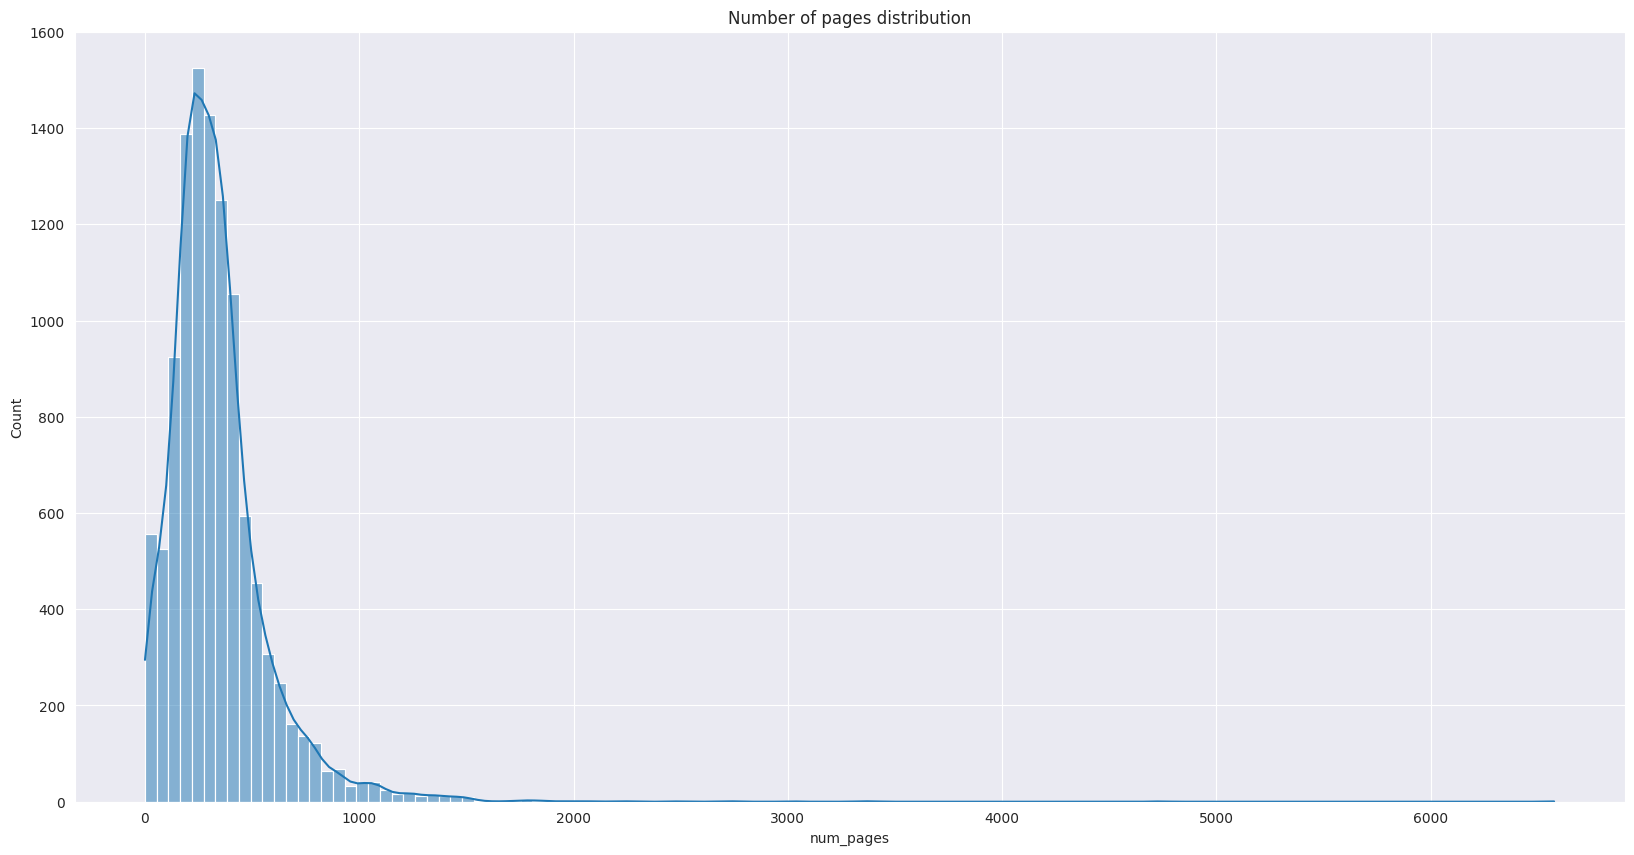

In [47]:
plt.figure(figsize=(20,10))
sns.histplot(data = books_df, x='num_pages', bins=120, kde=True).set(title='Number of pages distribution')
plt.show()

The distribution of num_pages column is skewed to higher values. Let's check using another chart. 

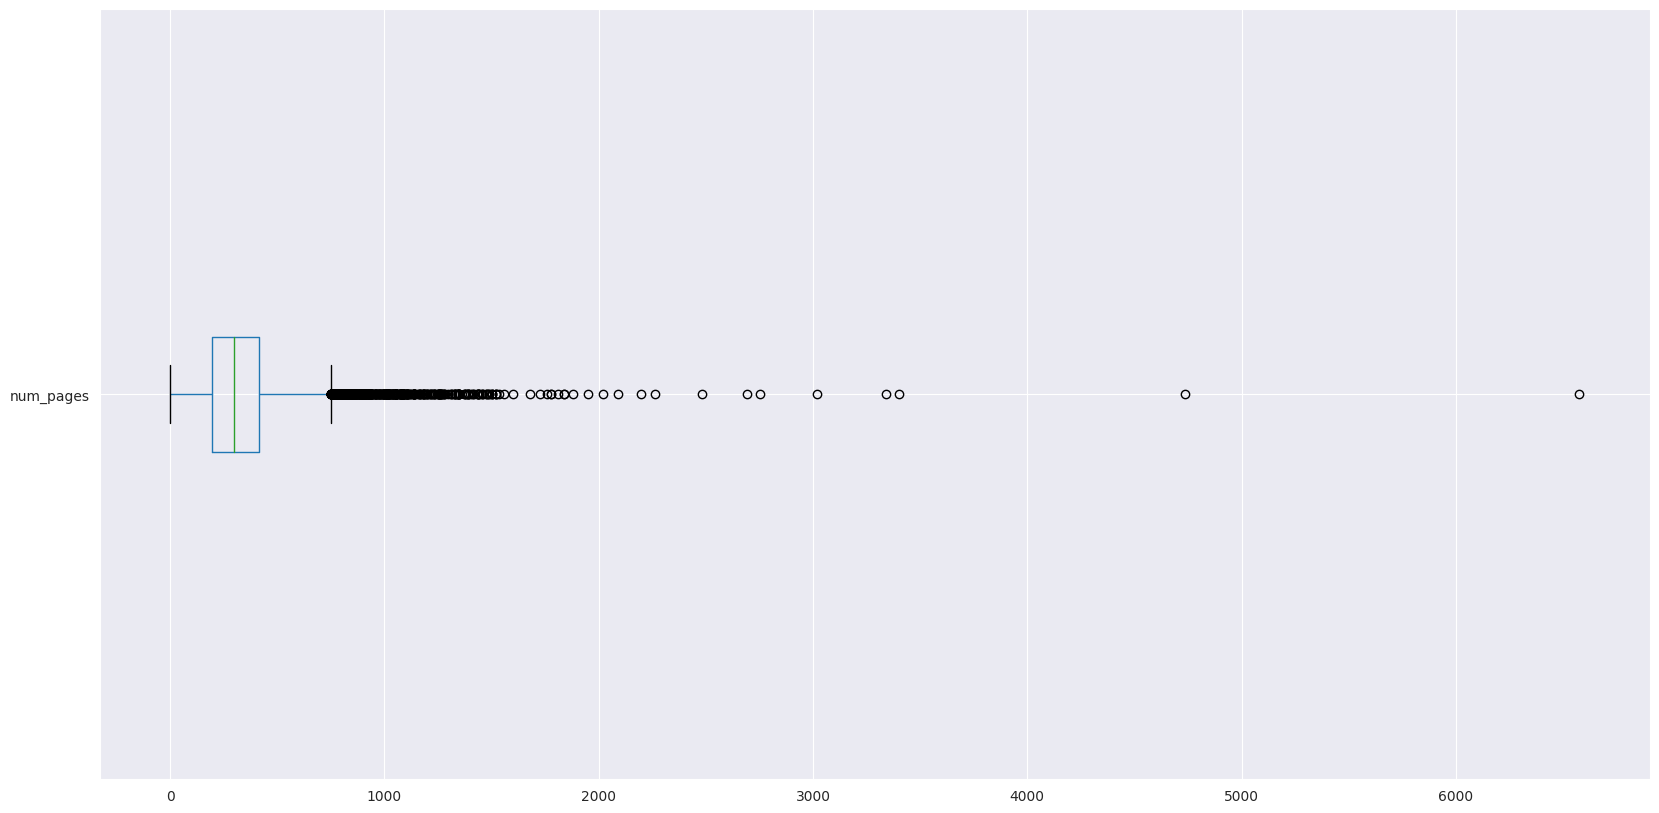

In [48]:
plt.figure(figsize=(20,10))
books_df.boxplot('num_pages',vert=False)
plt.show()

In [49]:
books_df.num_pages.median()

299.0

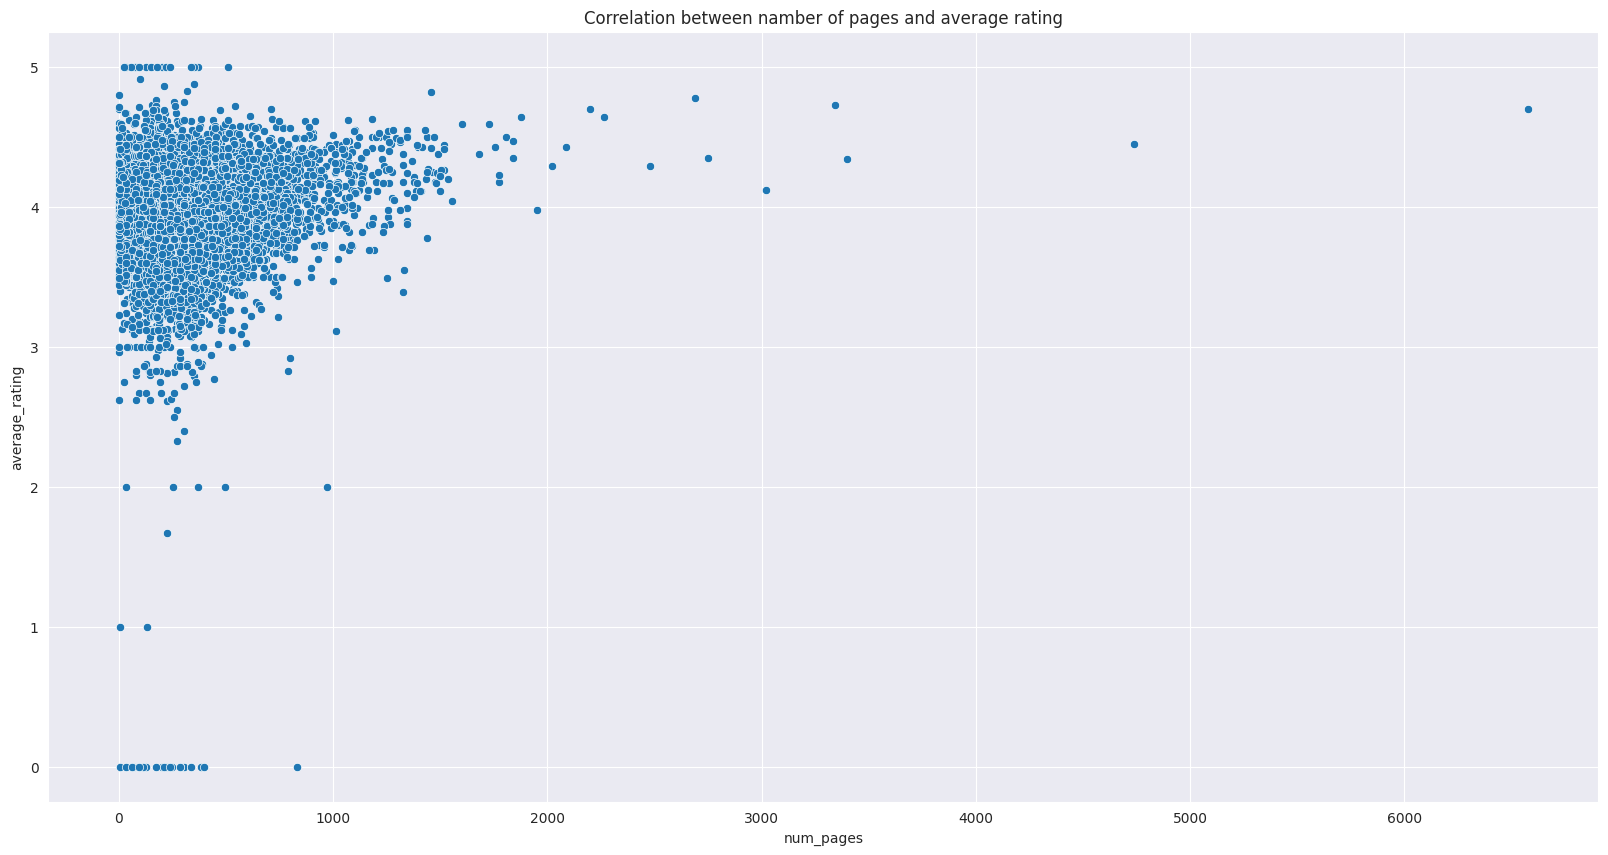

In [50]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = books_df, x='num_pages', y='average_rating').set(title='Correlation between namber of pages and average rating')
plt.show()

### Ratings count

In [51]:
books_df['ratings_count'].describe()

count    1.106400e+04
mean     1.803853e+04
std      1.127911e+05
min      0.000000e+00
25%      1.090000e+02
50%      7.610000e+02
75%      5.040750e+03
max      4.597666e+06
Name: ratings_count, dtype: float64

In [52]:
books_df.ratings_count.median()

761.0

<Axes: title={'center': 'Distribution of Average rating & Rating count'}, xlabel='average_rating', ylabel='ratings_count'>

<Figure size 2000x1000 with 0 Axes>

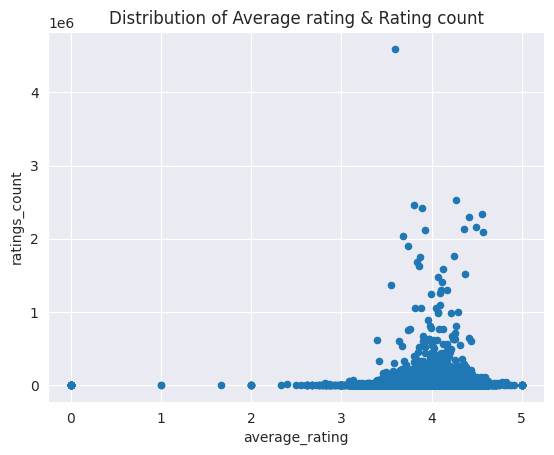

In [53]:
plt.figure(figsize=(20,10))
books_df.plot.scatter(
    y="ratings_count", 
    x="average_rating", 
    grid=True,
    title="Distribution of Average rating & Rating count"
)

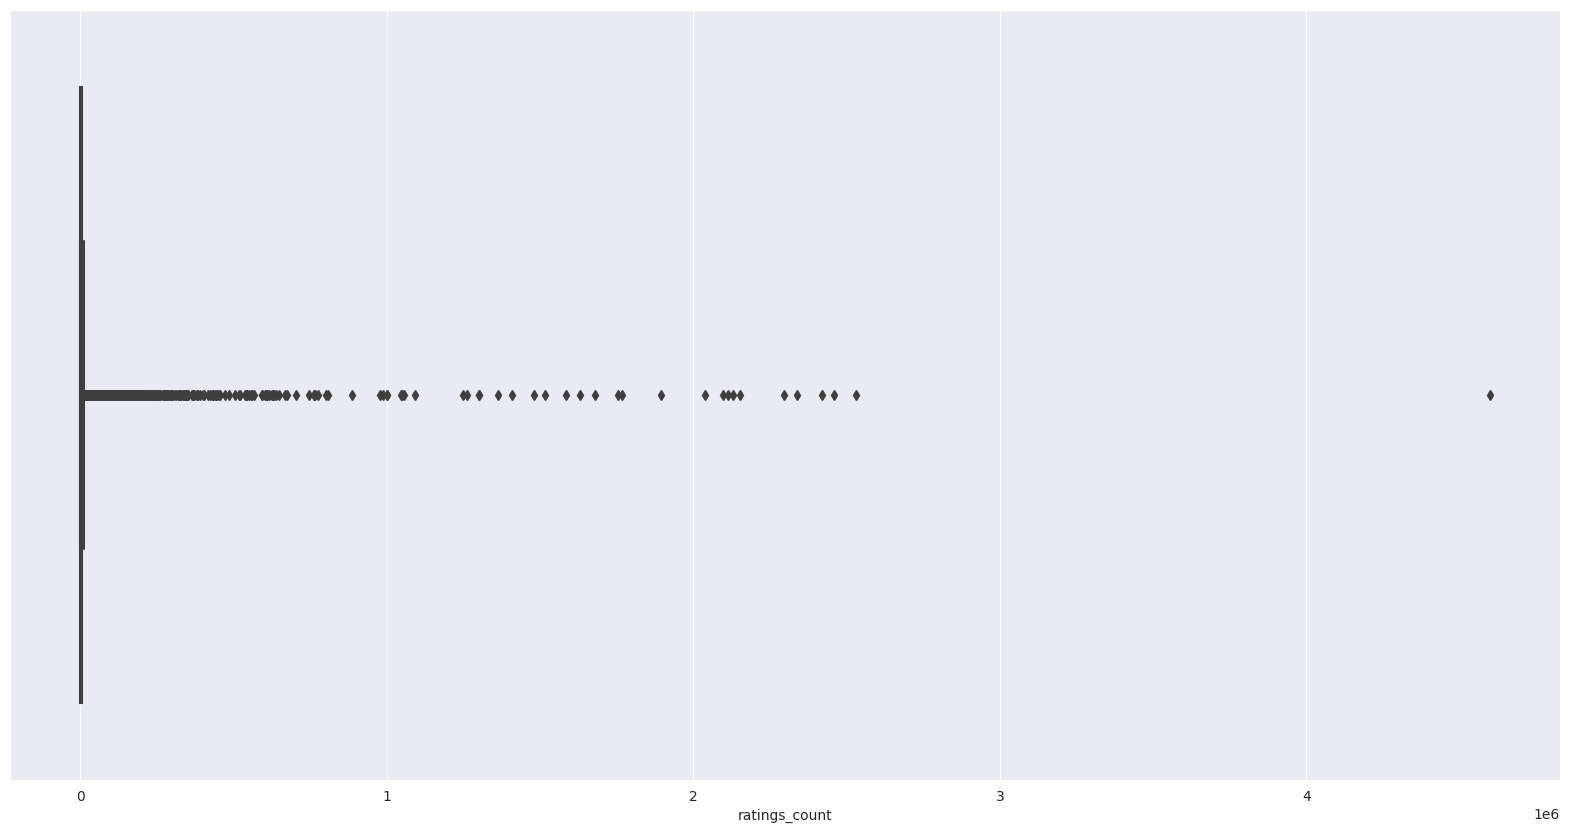

In [54]:
plt.figure(figsize=(20,10))
sns.boxplot(data = books_df, x='ratings_count')
plt.show()

/home/mh06/.pyenv/versions/python3.10.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 2000x1000 with 0 Axes>

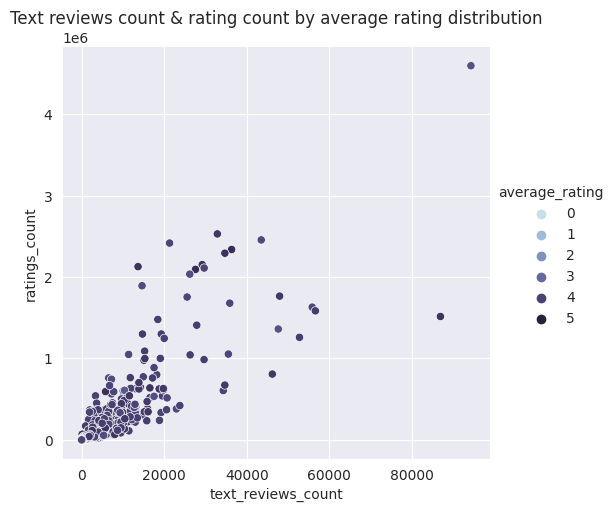

In [55]:
plt.figure(figsize=(20,10))
sns.relplot(data=books_df, x="text_reviews_count", y="ratings_count", hue="average_rating", palette = "ch:s=.25,rot=-.25").set(title='Text reviews count & rating count by average rating distribution')
plt.show()

### Text reviews count

In [56]:
books_df['text_reviews_count'].describe()

count    11064.000000
mean       544.938268
std       2583.176306
min          0.000000
25%          9.000000
50%         47.000000
75%        241.000000
max      94265.000000
Name: text_reviews_count, dtype: float64

As we can see more than half of books in our dataset have less than 100 text reviews in general.

In [57]:
print('Books with text_reviews_counts < 100:')
print(books_df[books_df.text_reviews_count < 100].shape[0])

Books with text_reviews_counts < 100:
6872


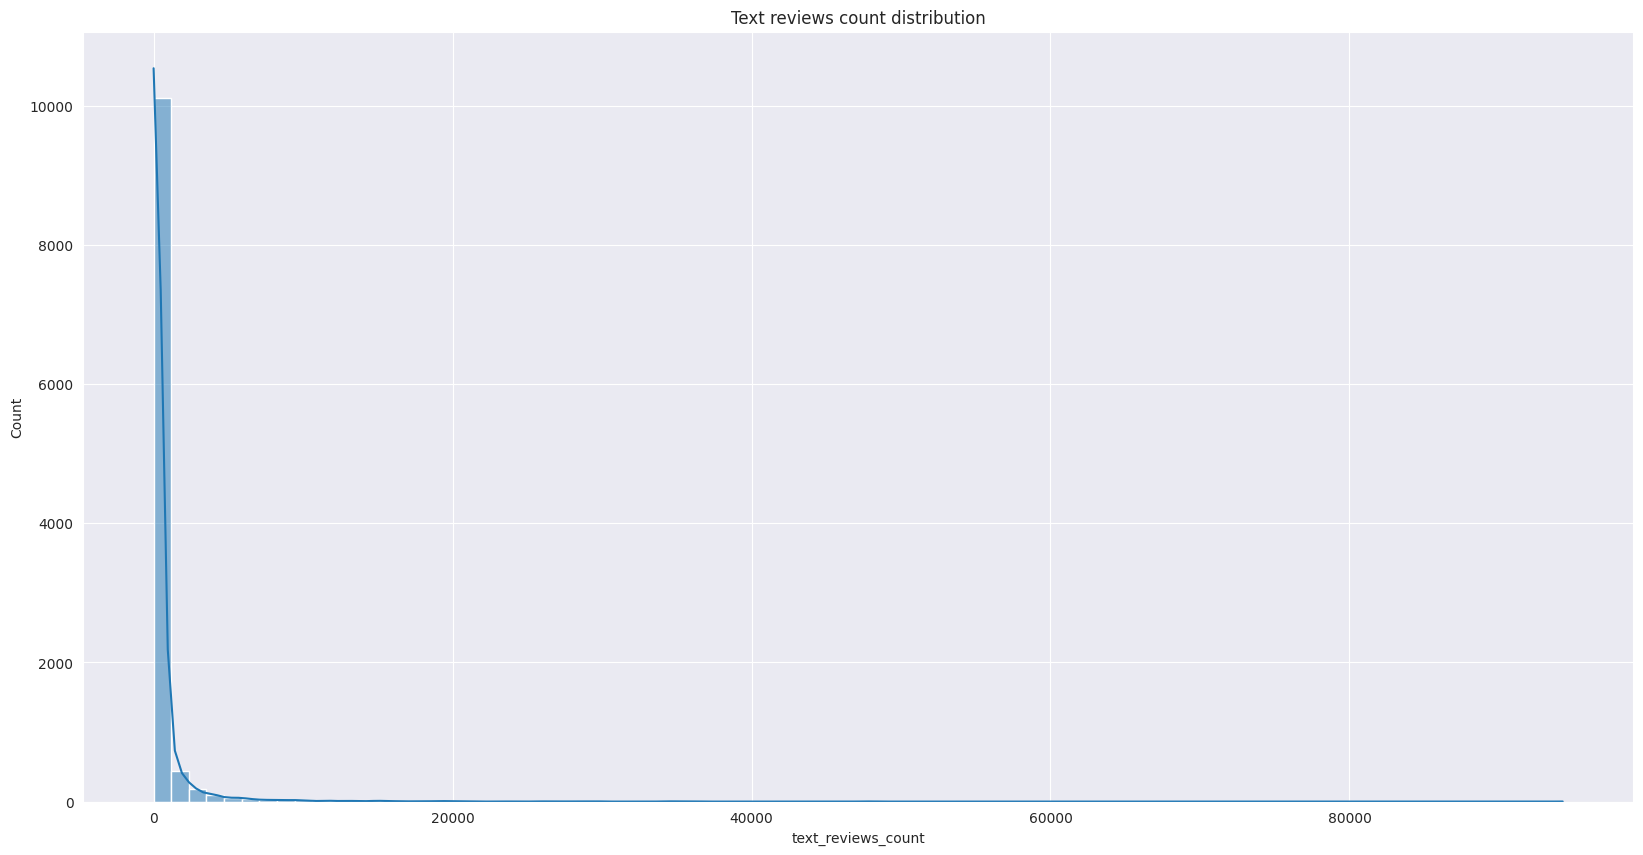

In [58]:
plt.figure(figsize=(20,10))
sns.histplot(data = books_df, x='text_reviews_count', bins=80, kde=True).set(title='Text reviews count distribution')
plt.show()

Let's see top 5 records about books which have the most number of text reviews.

In [59]:
books_df.sort_values(by='text_reviews_count', ascending=False).head(5)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,written_books,followers,quotes,discussions,questions
10336,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,501,4597666,94265,9/6/2006,Little Brown and Company,68.0,73400.0,512.0,1178.0,419.0
5270,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf,44.0,38500.0,1432.0,1105.0,245.0
1069,The Giver (The Giver #1),Lois Lowry,4.13,eng,208,1585589,56604,1/24/2006,Ember,127.0,20600.0,306.0,804.0,271.0
284,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.86,eng,197,1631221,55843,5/1/1993,HarperCollins,300.0,13100.0,2340.0,307.0,117.0
10700,Water for Elephants,Sara Gruen,4.09,eng,335,1260027,52759,5/1/2007,Algonquin Books,27.0,6339.0,158.0,185.0,28.0


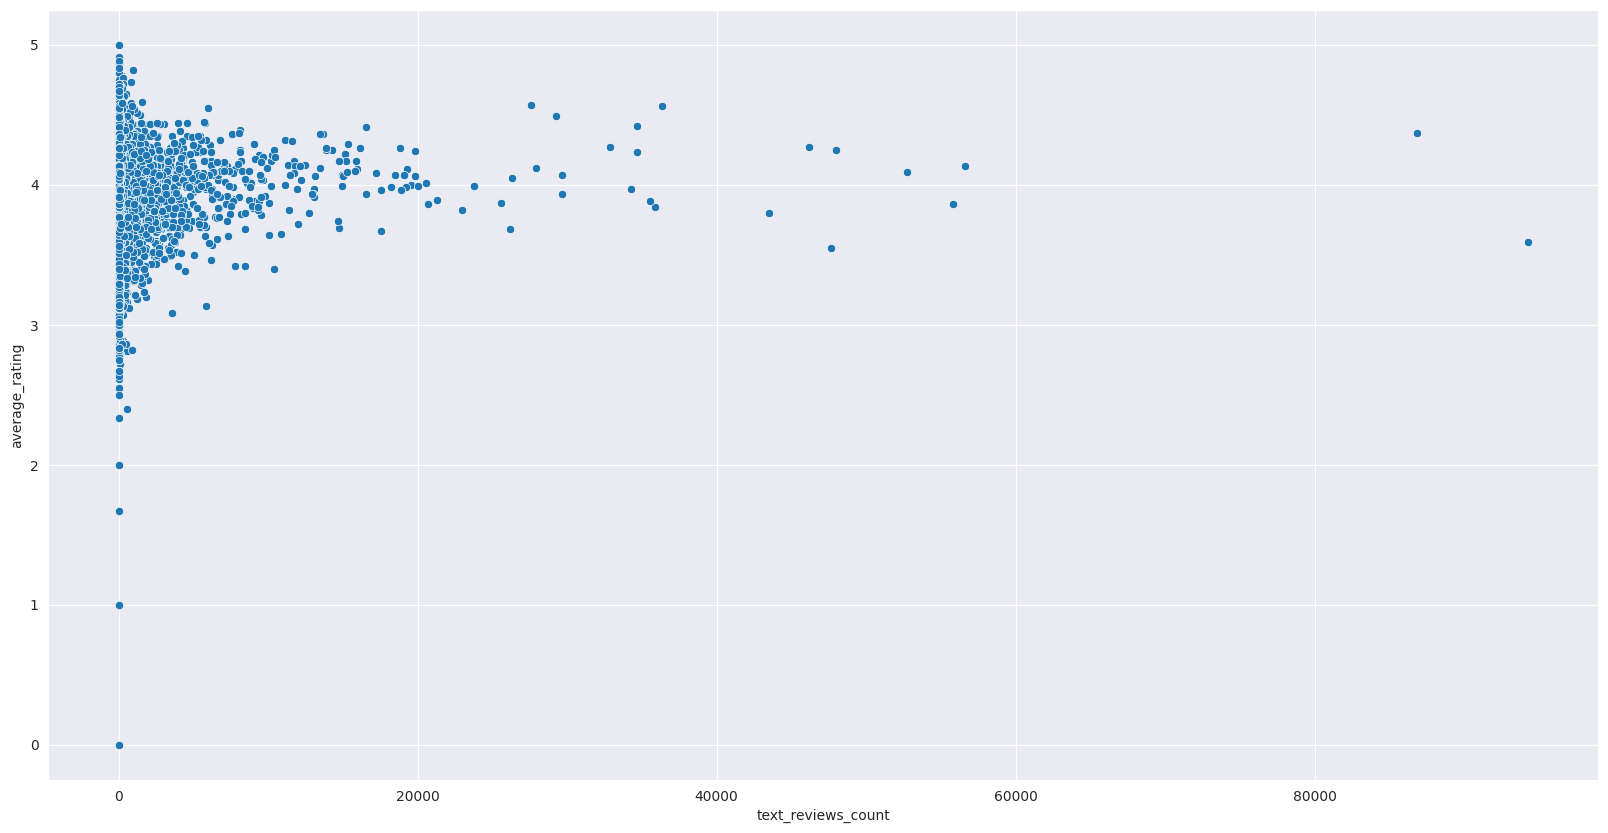

In [60]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = books_df, x='text_reviews_count', y='average_rating')
plt.show()

### _- Analysing scraped columns (numerical ones)_ 

We decided to extend our dataset by the information provided on the Goodread site such as; 
- __quotes, discussion and questions__ - 3 columns related to the book in our records;
- __written-books and followers__ - 2 columns which give us more information about each main author in our dataset.

###  Quotes

According to results of merging we had some rows with missing data in couple of rows. Let's invastigate if there are any in our dataset now.

In [62]:
books_df.isnull().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
written_books         4
followers             4
quotes                0
discussions           0
questions             0
dtype: int64

So at the moment we have missing data only in written_books and followers which we plan to remove or impute in preprocessing pipeline.

In [63]:
# Let's investigate 
books_df[books_df.written_books.isnull()]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,written_books,followers,quotes,discussions,questions
1271,The Grapes of Wrath,John Steinbeck,3.96,eng,597,37,8,3/1/2001,Longman Schools Division (a Pearson Education ...,NaN,NaN,651.0,120.0,23.0
5555,The Battle Of Corrin (Legends of Dune #3),Brian Herbert/Kevin J. Anderson,3.74,eng,624,59,2,9/1/2004,Hodder & Stoughton Ltd,NaN,NaN,12.0,1.0,0.0
6900,Glamorama,Bret Easton Ellis/Pierre Guglielmina,3.46,fre,537,56,5,2/15/2001,10/18,NaN,NaN,17.0,7.0,3.0
10355,Nos rêves de Castelbay,Maeve Binchy,3.80,fre,434,1,0,3/29/1999,Editions du Rocher,NaN,NaN,10.0,0.0,0.0


In [64]:
len(books_df)

11064

There are 11064 records in our dataset. Let's not delete 4 lines for the moment***.

In [65]:
# Dropping few lines
#index_to_delete = books_df[books_df.written_books.isnull()].index
#books_df.drop(index = index_to_delete, inplace=True)
#books_df

In [66]:
books_df['quotes'].describe()

count    11064.000000
mean        68.456435
std        225.912574
min          0.000000
25%          0.000000
50%          3.000000
75%         29.000000
max       2801.000000
Name: quotes, dtype: float64

So we can see the huge difference between maximum and minimum of quotes (from none till 2801) because 75% of books in the dataset contain less than 30 quotes.

/home/mh06/.pyenv/versions/python3.10.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 2000x1000 with 0 Axes>

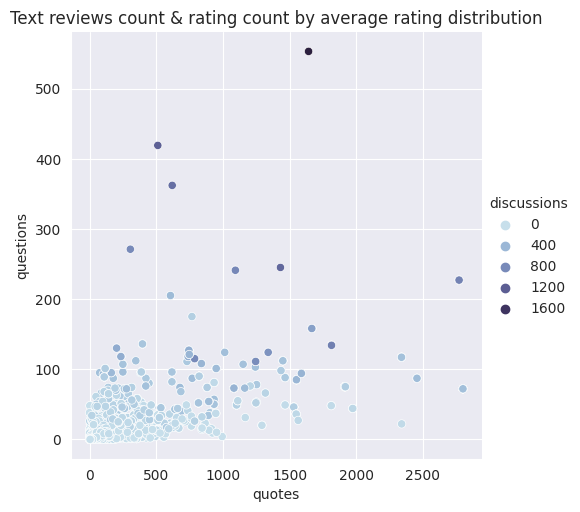

In [67]:
plt.figure(figsize=(20,10))
sns.relplot(data=books_df, x="quotes", y="questions", hue="discussions", palette = "ch:s=.25,rot=-.25").set(title='Text reviews count & rating count by average rating distribution')
plt.show()

### Discussions

In [68]:
books_df['discussions'].describe()

count    11064.000000
mean        18.830351
std         76.615805
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max       1824.000000
Name: discussions, dtype: float64

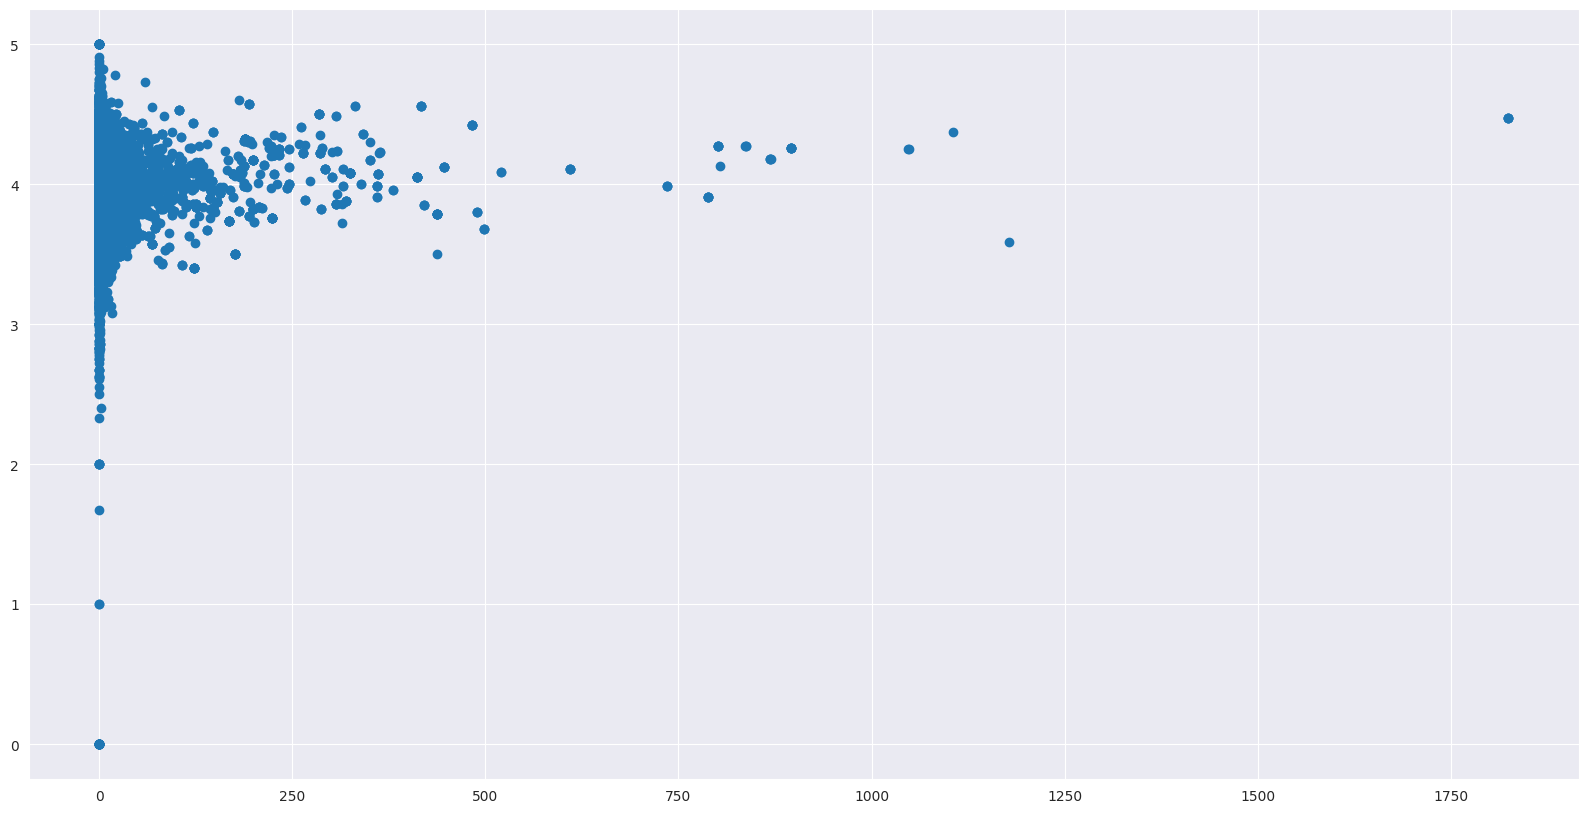

In [69]:
plt.figure(figsize=(20,10))
plt.scatter(books_df["discussions"],books_df["average_rating"])
plt.show()

It seems that only 25% of books were discussed more than 5 times. The mean is almost 18. 

So let's check the average rating for books with number of discussion is less than 18.

### Questions

In [71]:
books_df['questions'].describe()

count    11064.000000
mean         5.862437
std         21.023226
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        553.000000
Name: questions, dtype: float64

### Written books

In [72]:
books_df['written_books'].describe()

count    11060.000000
mean       967.483544
std       3579.090688
min          1.000000
25%         51.000000
50%        156.000000
75%        584.000000
max      79100.000000
Name: written_books, dtype: float64

###  Followers

In [74]:
books_df['followers'].describe()

count    11060.000000
mean      7716.232459
std      15284.290182
min          0.000000
25%        159.000000
50%       1636.500000
75%       7055.250000
max      99400.000000
Name: followers, dtype: float64

/home/mh06/.pyenv/versions/python3.10.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 2000x1000 with 0 Axes>

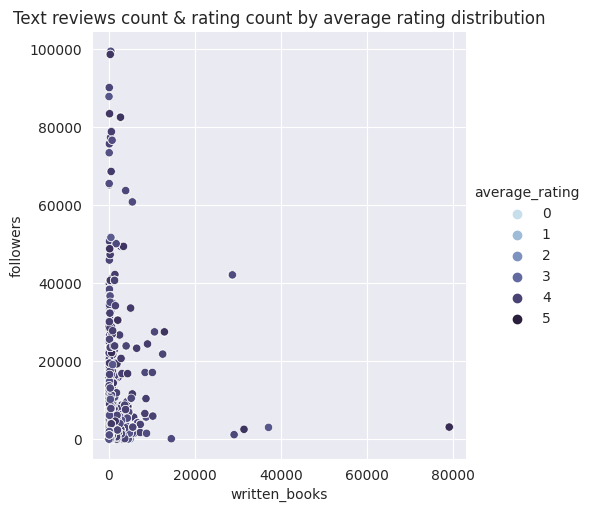

In [75]:
plt.figure(figsize=(20,10))
sns.relplot(data=books_df, x="written_books", y="followers", hue="average_rating", palette = "ch:s=.25,rot=-.25").set(title='Text reviews count & rating count by average rating distribution')
plt.show()

In [78]:
CatVarS = ['title', 'authors', 'language_code', 'publication_date', 'publisher']
books_df_subset = books_df.drop(columns=CatVarS)
corr_matrix = books_df_subset.corr()

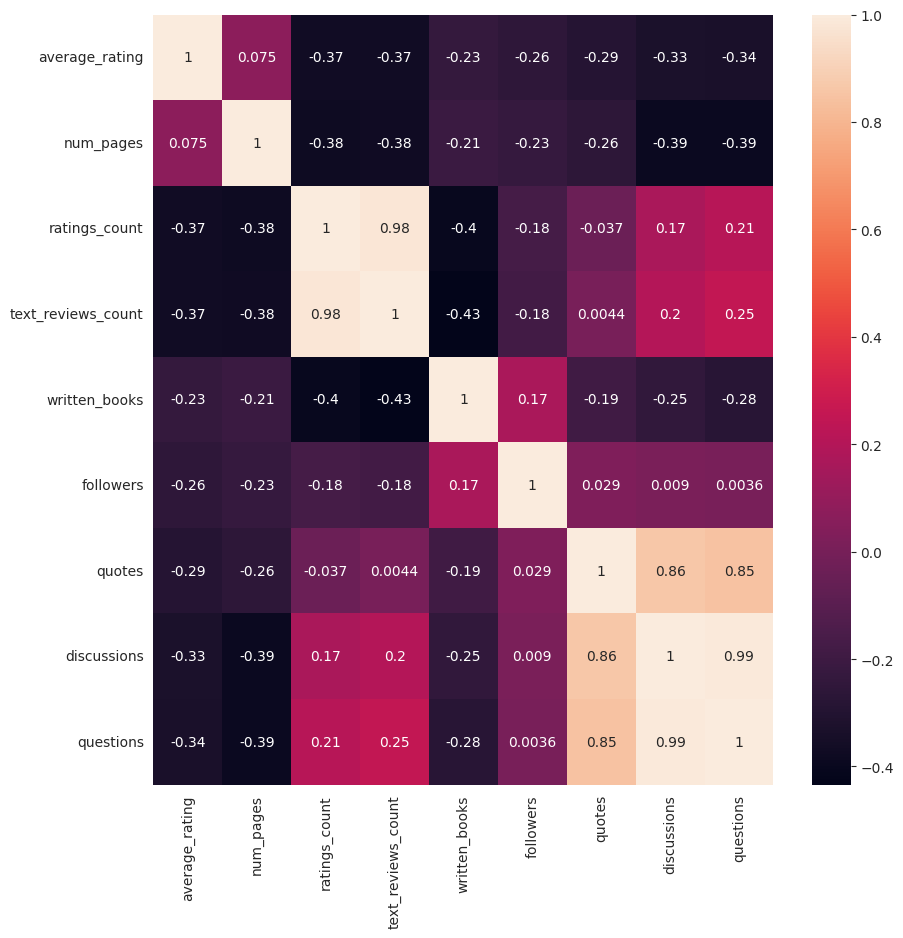

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix.corr(),annot=True)
plt.show()

rating_count and text_review_count are highly positively correlated.

also are quotes discussions and questions


### _- Let's check the categorical variables in our dataset_

In [80]:
CatVarS = ['title', 'authors', 'language_code', 'publication_date', 'publisher']
books_df[CatVarS].describe()

,title,authors,language_code,publication_date,publisher
count,11064,11064,11064,11064,11064
unique,10293,6605,27,3662,2269
top,The Iliad,P.G. Wodehouse,eng,10/1/2005,Vintage
freq,9,40,8864,55,318


According to the results:
1. _The top recurring book title_ is "The Brothers Karamazov" (count of 9).
2. Stephen King is _the author with the most books_ (count of 40).
3. Most of the books are in _English_ (8943 out of 11127).
4. _The top publication date_ is January 10, 2005 (count of 55). 
5. "Vintage" publisher is _the most popular_ one (count of 318).

### Title of the books

Some titles include strings inside parenthesis, including '#'.

As we checked, this means the book belongs to a series or saga.

So we create a new feature : 'belongs-to-series' with values 0 (does not belong to a series) or 1 (belongs to a series).

In [81]:
# Create the 'belongs_to_series' column
books_df['belongs_to_series'] = books_df['title'].apply(lambda title: 1 if '#' in title else 0)
books_df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,written_books,followers,quotes,discussions,questions,belongs_to_series
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,609.0,22200.0,882.0,194.0,74.0,1
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,627.0,22200.0,1152.0,307.0,107.0,1
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,609.0,22200.0,745.0,483.0,127.0,1
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,627.0,22200.0,747.0,417.0,121.0,1
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic,627.0,22200.0,1.0,20.0,2.0,1


In [83]:
books_df.drop(columns=CatVarS).groupby(by="belongs_to_series").agg("median").average_rating

belongs_to_series
0    3.95
1    3.98
Name: average_rating, dtype: float64

### Authors

The authors column can contain 1 or more names separated with '/'.

We chose to keep only the first name, since the web site uses the main author as the first of the list.

However, we want to keep track of the fact that some books have collaborators.

We decided to create a new feature called 'total_number_collaborators' (including main author to avoid values as 0).

In [84]:
books_df['main_author'] = books_df['authors'].str.split('/').str[0]
books_df['number_of_collaborators'] = books_df.authors.str.count('/')+1
books_df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,written_books,followers,quotes,discussions,questions,belongs_to_series,main_author,number_of_collaborators
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,609.0,22200.0,882.0,194.0,74.0,1,J.K. Rowling,2
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,627.0,22200.0,1152.0,307.0,107.0,1,J.K. Rowling,2
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,609.0,22200.0,745.0,483.0,127.0,1,J.K. Rowling,1
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,627.0,22200.0,747.0,417.0,121.0,1,J.K. Rowling,2
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic,627.0,22200.0,1.0,20.0,2.0,1,J.K. Rowling,2


In [85]:
# Dropping authors column
books_df = books_df.drop(['authors'], axis=1)
books_df.columns.tolist()

['title',
 'average_rating',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher',
 'written_books',
 'followers',
 'quotes',
 'discussions',
 'questions',
 'belongs_to_series',
 'main_author',
 'number_of_collaborators']

The __highest average ratings__ are applicable for books of these main authors:

In [86]:
books_df.groupby('main_author').mean(numeric_only=True).sort_values(by='average_rating', ascending=False).head()

,average_rating,num_pages,ratings_count,text_reviews_count,written_books,followers,quotes,discussions,questions,belongs_to_series,number_of_collaborators
main_author,,,,,,,,,,,
Elena N. Mahlow,5.0,202.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Ian Martin,5.0,96.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
Julie Sylvester,5.0,83.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0
Middlesex Borough Heritage Committee,5.0,128.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
Nicholas Evans,5.0,150.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0


In [925]:
#Counting the number of times each author appears in the dataset
# books_df.main_author[books_df.main_author.isin(topratings_authors)].value_counts()

### Language code

In [87]:
pd.unique(books_df['language_code'])

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [88]:
books_df.language_code.value_counts()

language_code
eng      8864
en-US    1408
en-GB     214
spa       212
fre       140
ger        96
jpn        45
mul        19
zho        14
grc        10
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

In [89]:
books_df

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,written_books,followers,quotes,discussions,questions,belongs_to_series,main_author,number_of_collaborators
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,609.0,22200.0,882.0,194.0,74.0,1,J.K. Rowling,2
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,627.0,22200.0,1152.0,307.0,107.0,1,J.K. Rowling,2
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,eng,352,6333,244,11/1/2003,Scholastic,609.0,22200.0,745.0,483.0,127.0,1,J.K. Rowling,1
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,627.0,22200.0,747.0,417.0,121.0,1,J.K. Rowling,2
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,eng,2690,41428,164,9/13/2004,Scholastic,627.0,22200.0,1.0,20.0,2.0,1,J.K. Rowling,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,Expelled from Eden: A William T. Vollmann Reader,4.06,eng,512,156,20,12/21/2004,Da Capo Press,85.0,1093.0,1.0,1.0,0.0,0,William T. Vollmann,3
11119,You Bright and Risen Angels,4.08,eng,635,783,56,12/1/1988,Penguin Books,85.0,1093.0,23.0,1.0,0.0,0,William T. Vollmann,1
11120,The Ice-Shirt (Seven Dreams #1),3.96,eng,415,820,95,8/1/1993,Penguin Books,85.0,1093.0,9.0,16.0,0.0,1,William T. Vollmann,1
11121,Poor People,3.72,eng,434,769,139,2/27/2007,Ecco,85.0,1093.0,4.0,1.0,0.0,0,William T. Vollmann,1


In [103]:
books_df['merged_languages'] = books_df['language_code']
books_df.merged_languages.replace(['en-US', 'en-GB', 'en-CA', 'enm'], 'eng', inplace=True)
books_df.merged_languages.replace(['spa', 'fre', 'ger', 'jpn', 'mul', 'zho', 'por', 'grc', 'ita', 'lat', 'swe', 'rus', 'nl', 'msa', 'glg',  'wel', 'ara', 'nor', 'tur', 'gla', 'ale', 'srp'], 'non-eng', inplace=True)
books_df

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,written_books,followers,quotes,discussions,questions,belongs_to_series,main_author,number_of_collaborators,merged_languages
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,609.0,22200.0,882.0,194.0,74.0,1,J.K. Rowling,2,eng
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,627.0,22200.0,1152.0,307.0,107.0,1,J.K. Rowling,2,eng
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,eng,352,6333,244,11/1/2003,Scholastic,609.0,22200.0,745.0,483.0,127.0,1,J.K. Rowling,1,eng
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,627.0,22200.0,747.0,417.0,121.0,1,J.K. Rowling,2,eng
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,eng,2690,41428,164,9/13/2004,Scholastic,627.0,22200.0,1.0,20.0,2.0,1,J.K. Rowling,2,eng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,Expelled from Eden: A William T. Vollmann Reader,4.06,eng,512,156,20,12/21/2004,Da Capo Press,85.0,1093.0,1.0,1.0,0.0,0,William T. Vollmann,3,eng
11119,You Bright and Risen Angels,4.08,eng,635,783,56,12/1/1988,Penguin Books,85.0,1093.0,23.0,1.0,0.0,0,William T. Vollmann,1,eng
11120,The Ice-Shirt (Seven Dreams #1),3.96,eng,415,820,95,8/1/1993,Penguin Books,85.0,1093.0,9.0,16.0,0.0,1,William T. Vollmann,1,eng
11121,Poor People,3.72,eng,434,769,139,2/27/2007,Ecco,85.0,1093.0,4.0,1.0,0.0,0,William T. Vollmann,1,eng


In [104]:
CatVarS = ['title', 'main_author', 'language_code', 'publication_date', 'publisher']
books_df.drop(columns=CatVarS).groupby(by="merged_languages").agg("median").average_rating

merged_languages
eng        3.96
non-eng    3.99
Name: average_rating, dtype: float64

### Publication date

Let's change the type for the column of publication_date from object into datetime64 and create a new column related to the year of the publication.

In [105]:
# Changing type of the column and checking if there is any values that are failed to convert ("NaT")
publication_date_correct = pd.to_datetime(books_df.publication_date, format='%m/%d/%Y',errors='coerce')
publication_date_correct[publication_date_correct.isnull()]

8177    NaT
11094   NaT
Name: publication_date, dtype: datetime64[ns]

In [106]:
# Investigating rows with errors in the dataframe
df_errors = pd.DataFrame(books_df,index=[31373, 45531])
df_errors

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,written_books,followers,quotes,discussions,questions,belongs_to_series,main_author,number_of_collaborators,merged_languages
31373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We assume the issue faced by the fact that June and November have only 30 days but not 31. Let's fix it.

In [107]:
publication_date_correct.loc[31373] = pd.to_datetime("11/30/2000", format="%m/%d/%Y")
publication_date_correct.loc[45531] = pd.to_datetime("6/30/1982", format="%m/%d/%Y")
publication_date_correct[[31373, 45531]]

31373   2000-11-30
45531   1982-06-30
Name: publication_date, dtype: datetime64[ns]

In [108]:
# Replace the original column into the converted one
books_df['publication_date'] = publication_date_correct

We decided to create for future analysis a new column called publication_year and drop the publication_date column.

In [109]:
books_df["publication_year"] = books_df['publication_date'].dt.year
books_df.head(10)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,written_books,followers,quotes,discussions,questions,belongs_to_series,main_author,number_of_collaborators,merged_languages,publication_year
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,609.0,22200.0,882.0,194.0,74.0,1,J.K. Rowling,2,eng,2006.0
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,627.0,22200.0,1152.0,307.0,107.0,1,J.K. Rowling,2,eng,2004.0
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,eng,352,6333,244,2003-11-01,Scholastic,609.0,22200.0,745.0,483.0,127.0,1,J.K. Rowling,1,eng,2003.0
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,627.0,22200.0,747.0,417.0,121.0,1,J.K. Rowling,2,eng,2004.0
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,eng,2690,41428,164,2004-09-13,Scholastic,627.0,22200.0,1.0,20.0,2.0,1,J.K. Rowling,2,eng,2004.0
5,"Unauthorized Harry Potter Book Seven News: ""Ha...",3.74,en-US,152,19,1,2005-04-26,Nimble Books,75.0,7.0,0.0,0.0,0.0,0,W. Frederick Zimmerman,1,eng,2005.0
6,Harry Potter Collection (Harry Potter #1-6),4.73,eng,3342,28242,808,2005-09-12,Scholastic,627.0,22200.0,0.0,60.0,2.0,1,J.K. Rowling,1,eng,2005.0
7,The Ultimate Hitchhiker's Guide: Five Complete...,4.38,eng,815,3628,254,2005-11-01,Gramercy Books,161.0,21900.0,494.0,27.0,18.0,1,Douglas Adams,1,eng,2005.0
8,The Ultimate Hitchhiker's Guide to the Galaxy ...,4.38,eng,815,249558,4080,2002-04-30,Del Rey Books,161.0,21900.0,494.0,27.0,18.0,1,Douglas Adams,1,eng,2002.0
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,4.22,eng,215,4930,460,2004-08-03,Crown,161.0,21900.0,817.0,286.0,52.0,1,Douglas Adams,1,eng,2004.0


In [110]:
books_df.publication_year.value_counts()

publication_year
2006.0    1692
2005.0    1253
2004.0    1065
2003.0     926
2002.0     792
          ... 
1943.0       1
1947.0       1
1929.0       1
1919.0       1
1940.0       1
Name: count, Length: 86, dtype: int64

<Axes: xlabel='publication_date'>

<Figure size 2000x1000 with 0 Axes>

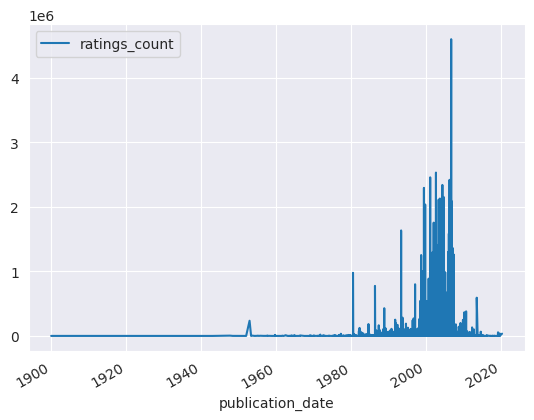

In [111]:
plt.figure(figsize=(20,10))
books_df.plot(x="publication_date", y="ratings_count")


According to the results of these 2 codes above most of books in our dataset were published in the beginning of 2000s. And it does not seem that the publication year have an important influence on the average_rating values.

In [112]:
# Let`s drop the colomn publication_date
books_df = books_df.drop(columns=['publication_date'])

### Publisher

Choices are difficult. It seems we could not drop this feature, since a good publisher may have a positive impact

Yet the feature is not clean, and is difficult if not impossible to clean with some python code

Some publishers have multiple divisions (for children, classics, spanish, drama...)

Others have different writings (Scholastic, Scholastic Inc, Scholastic Inc.)

We have to check case by case if two similar strings are really duplicates of the name of a single company

Let's begin removing multiple spaces (We have 'Scholastic Inc.' and 'Scholastic  Inc.', so maybe others as well)

In [113]:
# Removing all double spaces
books_df['publisher'] = books_df['publisher'].str.replace('  ',' ')
books_df.head()

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,written_books,followers,quotes,discussions,questions,belongs_to_series,main_author,number_of_collaborators,merged_languages,publication_year
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,Scholastic Inc.,609.0,22200.0,882.0,194.0,74.0,1,J.K. Rowling,2,eng,2006.0
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,Scholastic Inc.,627.0,22200.0,1152.0,307.0,107.0,1,J.K. Rowling,2,eng,2004.0
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,eng,352,6333,244,Scholastic,609.0,22200.0,745.0,483.0,127.0,1,J.K. Rowling,1,eng,2003.0
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,Scholastic Inc.,627.0,22200.0,747.0,417.0,121.0,1,J.K. Rowling,2,eng,2004.0
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,eng,2690,41428,164,Scholastic,627.0,22200.0,1.0,20.0,2.0,1,J.K. Rowling,2,eng,2004.0


In [114]:
# let's count how many unique values are remaining
books_df['publisher'].nunique()

2260

In [115]:
# 2241 is still a lot
# Some books have co-publishers (separator is '/'). We decide to keep the first publisher only
# We create the 'main_publisher' feature
main_publisher = books_df['publisher'].str.split('/', n=1, expand=True)
books_df['main_publisher']=main_publisher[0]

In [116]:
# We reduced unique values a little bit
books_df['main_publisher'].nunique()

2222

## So far we can say we have a prepared dataset for a preprocessing pipeline and modelling

In [119]:
print(books_df.columns)
books_df.drop(columns=['title', 'language_code', 'publisher'], inplace=True)

Index(['title', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publisher', 'written_books',
       'followers', 'quotes', 'discussions', 'questions', 'belongs_to_series',
       'main_author', 'number_of_collaborators', 'merged_languages',
       'publication_year', 'main_publisher'],
      dtype='object')


In [121]:
books_df.dtypes

average_rating             float64
num_pages                    int64
ratings_count                int64
text_reviews_count           int64
written_books              float64
followers                  float64
quotes                     float64
discussions                float64
questions                  float64
belongs_to_series            int64
main_author                 object
number_of_collaborators      int64
merged_languages            object
publication_year           float64
main_publisher              object
dtype: object

In [122]:
version = 1
filename = f"{BASE_PATH}/data/prepared/books_prepared_{version}.csv"
books_df.to_csv(filename)

## STEP 2: FEATURE SELECTION

In [123]:
books_df.head()

,average_rating,num_pages,ratings_count,text_reviews_count,written_books,followers,quotes,discussions,questions,belongs_to_series,main_author,number_of_collaborators,merged_languages,publication_year,main_publisher
0,4.57,652,2095690,27591,609.0,22200.0,882.0,194.0,74.0,1,J.K. Rowling,2,eng,2006.0,Scholastic Inc.
1,4.49,870,2153167,29221,627.0,22200.0,1152.0,307.0,107.0,1,J.K. Rowling,2,eng,2004.0,Scholastic Inc.
2,4.42,352,6333,244,609.0,22200.0,745.0,483.0,127.0,1,J.K. Rowling,1,eng,2003.0,Scholastic
3,4.56,435,2339585,36325,627.0,22200.0,747.0,417.0,121.0,1,J.K. Rowling,2,eng,2004.0,Scholastic Inc.
4,4.78,2690,41428,164,627.0,22200.0,1.0,20.0,2.0,1,J.K. Rowling,2,eng,2004.0,Scholastic


We have three categorical features: let's define a first strategy

* main_author: since there are no typos in this column we can keep it and encode it (ordinal encoding)

* merged_languages: one-hot encoder, because we have only two classes

* main_publisher: not very good data, a lot of typos, let's not use it for the moment

* belongs_to_series is actually categorical, but we will not encode it since most regression models handle binary features


We have very few missing values: imputation with median

In [129]:
books_df.isnull().sum()

average_rating             0
num_pages                  0
ratings_count              0
text_reviews_count         0
written_books              4
followers                  4
quotes                     0
discussions                0
questions                  0
belongs_to_series          0
main_author                0
number_of_collaborators    0
merged_languages           0
publication_year           2
main_publisher             0
dtype: int64

## Preprocessing Pipeline

In [171]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [130]:
books_df.columns

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count',
       'written_books', 'followers', 'quotes', 'discussions', 'questions',
       'belongs_to_series', 'main_author', 'number_of_collaborators',
       'merged_languages', 'publication_year', 'main_publisher'],
      dtype='object')

In [156]:
numeric_features = ["num_pages", "ratings_count", "text_reviews_count", "written_books","followers", "quotes", "discussions", "questions","belongs_to_series", "number_of_collaborators", "publication_year"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

main_author_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

language_code_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("main_author", main_author_transformer, ["main_author"]),
        ("language", language_code_transformer, ["merged_languages"])
    ]
)

In [144]:
# Append a Linear Regression
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)

In [148]:
# Split the data into training and test sets
X = books_df.drop('average_rating', axis=1)
y = books_df['average_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit and evaluate the model
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("model score: %.3f" % r2)

model score: 0.041


Linear regression is not working ! or the data is not good enough ... Let's try another model

In [160]:
# Create the KNN Regressor pipeline
knn_regressor = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", KNeighborsRegressor(n_neighbors=5))]
)

# Fit and evaluate the KNN Regressor
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score: %.3f" % r2)

R-squared score: -0.081


Not better !

In [178]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=0)

# Create the Regressor pipeline
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", random_forest)]
)

# Fit and evaluate the KNN Regressor
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score: %.3f" % r2)

ImportError: cannot import name '_any_isnan_axis0' from 'sklearn.tree._utils' (/home/mh06/.pyenv/versions/python3.10.10/lib/python3.10/site-packages/sklearn/tree/_utils.cpython-310-x86_64-linux-gnu.so)

ImportError: cannot import name '_any_isnan_axis0' from 'sklearn.tree._utils' (/home/mh06/.pyenv/versions/python3.10.10/lib/python3.10/site-packages/sklearn/tree/_utils.cpython-310-x86_64-linux-gnu.so)

* Issues importing RandomForestRegressor

In [177]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Create the Regressor pipeline
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", random_forest)]
)

# Fit and evaluate the KNN Regressor
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score: %.3f" % r2)

ImportError: cannot import name '_any_isnan_axis0' from 'sklearn.tree._utils' (/home/mh06/.pyenv/versions/python3.10.10/lib/python3.10/site-packages/sklearn/tree/_utils.cpython-310-x86_64-linux-gnu.so)

ImportError: cannot import name '_any_isnan_axis0' from 'sklearn.tree._utils' (/home/mh06/.pyenv/versions/python3.10.10/lib/python3.10/site-packages/sklearn/tree/_utils.cpython-310-x86_64-linux-gnu.so)

* Issues importing RandomForestRegressor


### Last hope, install pycaret

In [161]:
!pip install --upgrade pycaret

In [162]:
from pycaret.regression import setup, compare_models, create_model

ImportError: cannot import name '_eigh' from 'sklearn.utils.fixes' (/home/mh06/.pyenv/versions/python3.10.10/lib/python3.10/site-packages/sklearn/utils/fixes.py)

ImportError: cannot import name '_eigh' from 'sklearn.utils.fixes' (/home/mh06/.pyenv/versions/python3.10.10/lib/python3.10/site-packages/sklearn/utils/fixes.py)


## Also have an issue with dependencies

#### So far, we have a doubt in our data preparation, we tried to use several models and even pycaret's automl, to confirm that, but without success.